In [2]:
#Recommendation algo benmark

In [3]:
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
'''def stdz(row):
  n_row = (row - row.mean())/(row.max()-row.min())
  return n_row

ratings_std = ratings.apply(stdz)
item_similarity = cosine_similarity(ratings_std.T)
print(item_similarity)'''


'def stdz(row):\n  n_row = (row - row.mean())/(row.max()-row.min())\n  return n_row\n\nratings_std = ratings.apply(stdz)\nitem_similarity = cosine_similarity(ratings_std.T)\nprint(item_similarity)'

In [5]:
ratings_f = pd.read_csv('ratings.csv')

In [6]:
ratings_f.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [7]:
X_train, X_test = train_test_split(ratings_f , test_size = 0.25 , random_state = 7)
print(X_train.shape , X_test.shape)

(75627, 4) (25209, 4)


In [8]:
user_based_data = X_train.pivot(index='userId',columns='movieId',values='rating').fillna(0)


In [9]:
user_based_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,184931,184987,185029,185031,185033,185135,185435,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193581,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ext_train = X_train.copy()
ext_test = X_test.copy()
ext_train['rating'] = ext_train['rating'].apply(lambda x : 0 if x > 0 else 1)
ext_test['rating'] = ext_test['rating'].apply(lambda x: 1 if x>0 else 0)


In [11]:

ext_train = ext_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

ext_test = ext_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

In [12]:
ext_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,184931,184987,185029,185031,185033,185135,185435,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193581,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
#User based similarity train/test (UBCF)

In [14]:
user_based_similarity = cosine_similarity(user_based_data)
user_based_similarity[np.isnan(user_based_similarity)] = 0
print(user_based_similarity)
print(user_based_similarity.shape)

[[1.         0.03302815 0.05931447 ... 0.21762437 0.08136144 0.11591651]
 [0.03302815 1.         0.         ... 0.03555538 0.03230221 0.06380481]
 [0.05931447 0.         1.         ... 0.01092097 0.         0.01221813]
 ...
 [0.21762437 0.03555538 0.01092097 ... 1.         0.09494528 0.25099833]
 [0.08136144 0.03230221 0.         ... 0.09494528 1.         0.0395847 ]
 [0.11591651 0.06380481 0.01221813 ... 0.25099833 0.0395847  1.        ]]
(610, 610)


In [15]:
user_predicted_ratings = np.dot(user_based_similarity, user_based_data)
user_predicted_ratings

array([[8.62459442e+01, 3.87094454e+01, 2.48946459e+01, ...,
        3.07323948e-02, 2.68908454e-02, 2.45566263e-01],
       [2.71181082e+01, 1.15934137e+01, 3.98478887e+00, ...,
        2.04722231e-01, 1.79131952e-01, 5.69656204e-01],
       [6.58928449e+00, 3.40463473e+00, 1.89649486e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.10488176e+02, 5.85610826e+01, 2.99512632e+01, ...,
        7.13168798e-02, 6.24022699e-02, 6.32611515e-01],
       [7.15070558e+01, 3.82264503e+01, 1.66183928e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.05337226e-01],
       [8.28770041e+01, 3.67906434e+01, 1.49803846e+01, ...,
        3.45090339e-01, 3.01954047e-01, 9.13440282e-01]])

In [16]:
user_final_ratings = np.multiply(user_predicted_ratings, ext_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,184931,184987,185029,185031,185033,185135,185435,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193581,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,38.709445,0.000000,0.963851,13.041253,0.000000,15.934616,2.356904,4.820051,47.172023,28.072925,5.884380,3.209258,5.825863,4.241386,34.544156,21.887230,7.627731,22.143963,4.337812,36.030266,13.265890,5.566435,7.486142,25.371847,6.188016,1.908941,2.310297,15.675680,0.643039,10.951154,70.144136,52.731775,23.980276,0.861582,29.539104,0.301789,6.559954,1.705509,2.671918,...,0.736661,0.552496,1.542621,0.386027,0.368330,0.428919,0.399330,0.957252,0.552496,0.460413,0.811215,3.045172,2.801113,0.595030,0.535527,1.383509,0.351790,0.537625,0.736661,0.452302,0.157923,0.290848,0.251279,0.048514,0.297515,0.340611,0.094754,0.252676,0.063169,0.094754,0.063169,0.063169,0.034574,0.026891,0.023049,0.030732,0.030732,0.030732,0.026891,0.245566
2,27.118108,11.593414,3.984789,0.149090,3.379038,12.235112,2.779774,0.545197,0.756325,11.532640,5.287494,1.652274,0.642065,0.369206,0.884379,12.908667,4.940551,2.624492,7.478181,2.180592,6.295026,2.816962,1.717777,1.386495,5.505677,1.343723,0.616045,0.828821,2.929316,0.026611,3.745357,18.888201,11.628234,5.816806,0.112976,6.900433,0.000000,0.953636,0.276101,0.312172,...,0.363310,0.272482,1.054365,0.782777,0.181655,0.869752,0.267653,0.550422,0.272482,0.227069,1.499956,2.249740,1.768190,0.237829,0.214046,0.724153,0.187777,0.513179,0.363310,0.241428,0.000000,0.286500,0.134127,0.020688,0.118914,0.431850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230313,0.179132,0.153542,0.204722,0.204722,0.204722,0.179132,0.569656
3,6.589284,3.404635,1.896495,0.054389,0.696805,5.137563,1.704299,0.262231,0.272466,3.721159,1.928690,0.820655,0.232072,0.325772,0.378062,3.095159,1.604537,1.235402,1.998603,0.382473,2.691112,0.944083,0.463164,0.574548,1.526510,0.579578,0.173549,0.097359,1.688870,0.098595,0.000000,6.819498,3.761806,1.853798,0.057002,2.061276,0.000000,0.546303,0.139582,0.185715,...,0.191564,0.143673,0.216182,0.007690,0.095782,0.008544,0.016412,0.207210,0.143673,0.119727,0.043741,0.339001,0.402117,0.002943,0.002649,0.220058,0.054628,0.008477,0.191564,0.070236,0.000000,0.000000,0.039020,0.006116,0.001472,0.008281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.610469,23.839996,11.504095,0.924556,7.504067,29.800049,9.967837,1.070168,2.041425,27.048334,20.194558,2.814317,1.970898,3.329434,2.174001,21.961972,18.644716,4.494296,12.964312,2.312765,26.541871,7.619991,2.950097,5.128861,18.719200,4.259573,1.020680,1.620909,13.244861,0.952768,6.952034,0.000000,36.613431,17.508329,0.512821,21.578197,0.033630,4.318252,1.041790,1.704660,...,0.554177,0.415633,1.081763,0.200354,0.277089,0.222616,0.244312,0.662702,0.415633,0.510264,0.358953,1.729568,1.692505,0.781992,0.703793,0.899531,0.253354,0.349863,0.554177,0.325741,0.092031,0.129197,0.180967,0.023738,0.390996,0.271720,0.055218,0.147249,0.036812,0.055218,0.036812,0.036812,0.033905,0.026370,0.022603,0.030137,0.030137,0.030137,0.026370,0.167341
5,0.000000,41.385546,15.908082,1.452083,16.957601,36.257791,18.491528,3.249430,4.259744,50.536005,31.974877,2.692027,3.004497,8.634459,5.586942,23.350663,25.435502,5.577219,20.138184,2.975556,41.786920,14.556518,4.873040,5.990546,26.396332,8.197139,2.506824,2.394021,9.908058,0.386694,13.037038,58.402052,58.728954,0.000000,0.366615,0.000000,0.148961,6.759961,0.812285,3.337963,...,0.364461,0.273346,0.752392,0.199903,0.182231,0.222114,0.229488,0.459770,0.273346,0.409286,0.414588,1.442727,1.300581,0.293862,0.264476,0.600216,0.123310,0.171709,0.364461,0.158541,0.00

In [17]:
user_final_ratings.iloc[6].sort_values(ascending = False)[0:5]


movieId
356     109.383282
318     104.037475
2571    102.497612
296      96.852559
260      89.230465
Name: 7, dtype: float64

In [18]:
#Item(movie) based similarity train/test (IBCF)

In [19]:
item_based_data = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
item_based_data.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,0.0,4.0,0.0,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
item_based_similarity = cosine_similarity(item_based_data)
item_based_similarity[np.isnan(item_based_similarity)] = 0
item_based_similarity

array([[1.        , 0.32032111, 0.23363678, ..., 0.        , 0.        ,
        0.        ],
       [0.32032111, 1.        , 0.22926225, ..., 0.        , 0.        ,
        0.        ],
       [0.23363678, 0.22926225, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [21]:
item_predicted_ratings = np.dot(item_based_data.T, item_based_similarity)
item_predicted_ratings

array([[1.80308823e+02, 1.38572656e+02, 1.63112925e+02, ...,
        4.48644213e-01, 4.48644213e-01, 3.18009623e+00],
       [1.71452817e+01, 1.38318171e+01, 8.96745426e+00, ...,
        8.97341855e-01, 8.97341855e-01, 4.48857240e+00],
       [7.57881988e+00, 7.39126026e+00, 5.67109055e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.98497204e+02, 3.71479351e+02, 3.38314019e+02, ...,
        2.31195052e+00, 2.31195052e+00, 2.08317505e+01],
       [2.60600689e+01, 2.27051483e+01, 1.82169473e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.02752421e-01],
       [5.96045767e+02, 4.16512951e+02, 2.73063366e+02, ...,
        2.24268656e+01, 2.24268656e+01, 4.42661387e+01]])

In [22]:
item_final_ratings = np.multiply(item_predicted_ratings, ext_train)
item_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,184931,184987,185029,185031,185033,185135,185435,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193581,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,138.572656,0.000000,20.798053,68.932834,0.000000,83.415962,35.354576,33.571158,144.232435,108.347206,75.632890,46.412411,33.035977,46.118442,129.125377,84.773083,85.461899,127.708920,63.635845,137.188611,99.094126,78.757778,87.830754,83.217399,78.577185,16.642734,25.831690,97.226695,36.921379,77.675004,165.968163,147.134720,86.797043,48.001059,116.813841,1.881267,72.666790,69.314801,63.097478,...,20.017437,20.017437,32.306579,7.513412,20.017437,7.513412,26.250473,31.917058,20.017437,10.609220,4.285906,37.361588,69.652490,13.568791,13.568791,38.162477,19.638860,9.491899,20.017437,19.638860,1.062308,1.821207,19.638860,2.526396,13.568791,7.622902,1.062308,1.062308,1.062308,1.062308,1.062308,1.062308,0.448644,0.448644,0.448644,0.448644,0.448644,0.448644,0.448644,3.180096
2,17.145282,13.831817,8.967454,0.445630,7.151103,13.350527,5.337126,2.981244,1.800900,11.473140,6.378202,7.718737,2.483855,0.546545,2.714156,15.999406,5.255131,9.086928,13.863203,10.822195,7.057829,6.329848,6.885318,6.578081,5.885069,5.313684,1.485167,2.758824,4.018957,0.324666,7.590390,15.024255,10.910110,5.791594,1.469139,8.374468,0.000000,3.145772,4.421320,1.782298,...,4.185909,4.185909,8.306360,7.957945,4.185909,7.957945,7.168446,7.726445,4.185909,2.218527,3.612775,9.560462,11.189249,3.478178,3.478178,5.078541,3.583553,3.494605,4.185909,3.583553,0.000000,0.834185,3.583553,0.386005,3.478178,4.252438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.897342,0.897342,0.897342,0.897342,0.897342,0.897342,0.897342,4.488572
3,7.578820,7.391260,5.671091,0.611325,2.233196,8.541772,4.693495,1.442807,1.471739,7.296909,3.957716,5.100435,1.589791,0.989461,2.237314,6.429671,3.069408,5.835561,6.837400,2.815640,5.500737,3.676131,3.041084,3.042369,2.638581,2.998226,0.553961,0.525451,5.064893,2.225120,0.000000,8.494715,5.757759,3.437821,1.175597,4.910908,0.000000,2.698975,2.897577,2.003400,...,2.515520,2.515520,1.971492,0.066956,2.515520,0.066956,0.517457,3.254819,2.515520,1.333223,0.130199,2.267308,4.347218,0.013213,0.013213,3.113323,1.296335,0.052077,2.515520,1.296335,0.000000,0.000000,1.296335,0.243468,0.013213,0.083533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,100.920267,75.634109,63.460921,22.028628,39.571413,87.717716,56.057032,12.812478,14.921365,71.435983,75.078182,29.643408,22.855129,20.337739,28.819845,77.543073,74.616061,50.802355,64.561542,26.474452,102.533367,57.050207,37.939012,58.661098,67.596031,52.494367,9.047384,15.805659,82.811736,63.409128,50.025947,0.000000,98.180125,71.969900,31.677285,87.096996,0.130105,48.803077,46.591577,48.444638,...,12.199198,12.199198,17.465865,3.307116,12.199198,3.307116,12.846173,18.056481,12.199198,7.308831,1.840966,15.796046,34.959318,20.759359,20.759359,14.066070,12.434403,4.164561,12.199198,12.434403,0.491866,0.746834,12.434403,1.061666,20.759359,4.823794,0.491866,0.491866,0.491866,0.491866,0.491866,0.491866,0.391388,0.391388,0.391388,0.391388,0.391388,0.391388,0.391388,2.209376
5,0.000000,30.991626,22.522994,7.901654,19.947259,27.325781,21.873483,11.251111,6.723946,30.444815,27.489465,8.148213,10.538185,12.929746,13.757641,21.474618,22.726133,13.532762,24.018209,8.952751,33.030199,22.087863,14.190323,14.991771,22.519882,19.318179,5.119061,6.199278,16.486383,7.690495,19.327027,30.625481,34.841193,0.000000,5.709343,0.000000,0.235543,15.812710,7.273534,16.007941,...,3.447016,3.447016,4.867094,1.356290,3.447016,1.356290,3.661469,4.787973,3.447016,2.

In [23]:
item_final_ratings.iloc[6].sort_values(ascending = False)[0:5]


movieId
1580    98.764934
6874    97.656344
3793    95.222498
4963    94.742405
1527    94.255148
Name: 7, dtype: float64

In [24]:
#Evaluation and metrics comparing Item vs User based collaborative filtering 

In [25]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0
test_user_similarity

array([[1.        , 0.        , 0.        , ..., 0.08850917, 0.        ,
        0.06751509],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08850917, 0.        , 0.        , ..., 1.        , 0.0231283 ,
        0.08963244],
       [0.        , 0.        , 0.        , ..., 0.0231283 , 1.        ,
        0.04765252],
       [0.06751509, 0.        , 0.        , ..., 0.08963244, 0.04765252,
        1.        ]])

In [26]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[ 9.71976773,  3.98578017,  1.06854926, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82173508,  0.67324489,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50377707,  0.21158918,  0.05462527, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [15.72283479,  5.17216637,  1.49584805, ...,  0.0781445 ,
         0.0781445 ,  0.0781445 ],
       [ 3.8275444 ,  2.53780492,  0.7315792 , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.84453355,  5.18566161,  0.77893544, ...,  0.07513588,
         0.07513588,  0.07513588]])

In [27]:

test_user_final_rating = np.multiply(user_predicted_ratings_test, ext_test)
test_user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,...,176579,176601,176621,176805,176935,177285,177593,177765,177939,178061,178323,178827,179709,179819,180031,180095,180297,180985,182715,182793,183199,183227,183295,183301,183635,183897,184015,184053,184257,184349,184471,184791,184997,185135,185473,187593,189111,193579,193583,193587
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.125282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.477369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.607786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
ratings_f['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [29]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] 

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

pred

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [1.89224542,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [30]:
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

25209

In [31]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,...,176579,176601,176621,176805,176935,177285,177593,177765,177939,178061,178323,178827,179709,179819,180031,180095,180297,180985,182715,182793,183199,183227,183295,183301,183635,183897,184015,184053,184257,184349,184471,184791,184997,185135,185473,187593,189111,193579,193583,193587
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#RMSE and MAE for UBCF

In [33]:
diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() 

rmse_u = np.sqrt(sum_of_squares_err/total_non_nan)
mae_u = np.abs(pred - test).sum().sum()/total_non_nan

print('RMSE :',rmse_u ,', MAE :',mae_u)

RMSE : 1.5884189032078766 , MAE : 1.2235680414568506


In [34]:
test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 
test_item_similarity

array([[1.        , 0.08395908, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08395908, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [35]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[18.25238561, 15.76464017,  5.94227587, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27494901,  0.85499211,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44113465,  0.21328485,  0.09595851, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [52.2044927 , 33.35054661, 10.22706782, ...,  0.75293379,
         0.75293379,  0.75293379],
       [ 1.34756125,  1.19293162,  0.50181118, ...,  0.        ,
         0.        ,  0.        ],
       [44.94714317, 51.62926205,  6.03195554, ...,  2.42078968,
         2.42078968,  2.42078968]])

In [36]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, ext_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,...,176579,176601,176621,176805,176935,177285,177593,177765,177939,178061,178323,178827,179709,179819,180031,180095,180297,180985,182715,182793,183199,183227,183295,183301,183635,183897,184015,184053,184257,184349,184471,184791,184997,185135,185473,187593,189111,193579,193583,193587
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.094234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.549160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.903354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:

from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy() 
X = X[X > 0]

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)
pred

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [2.01755785,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [38]:
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

25209

In [39]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,...,176579,176601,176621,176805,176935,177285,177593,177765,177939,178061,178323,178827,179709,179819,180031,180095,180297,180985,182715,182793,183199,183227,183295,183301,183635,183897,184015,184053,184257,184349,184471,184791,184997,185135,185473,187593,189111,193579,193583,193587
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#RMSE and MAE for IBCF

In [41]:
diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum()

rmse_i = np.sqrt(sum_of_squares_err/total_non_nan)
mae_i = np.abs(pred - test).sum().sum()/total_non_nan
print('RMSE :',rmse_i ,', MAE :',mae_i)


RMSE : 2.519396855887471 , MAE : 2.223199302724426


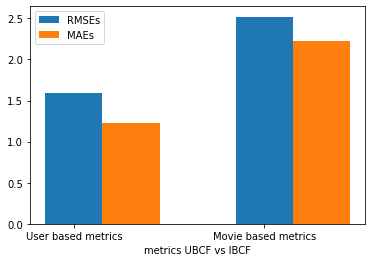

In [44]:

#summary and 
rmses = [rmse_u , rmse_i]
maes = [mae_u,mae_i]
label = ['User based metrics','Movie based metrics']
plt.xticks(range(len(label)),labels=label)
plt.xlabel('metrics UBCF vs IBCF')
plt.bar(np.arange(len(rmses)),rmses,width=0.3 ,label='RMSEs')
plt.bar(np.arange(len(maes))+0.3,maes,width=0.3 , label='MAEs')
plt.legend()

#print(rmses)

In [ ]:
!pip install surprise


In [48]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split


data = Dataset.load_builtin('ml-100k')


trainset, testset = train_test_split(data, test_size=.25)


algo = SVD()


algo.fit(trainset)
predictions = algo.test(testset)


rmse_svd = accuracy.rmse(predictions)
mae_svd = accuracy.mae(predictions)

RMSE: 0.9415
MAE:  0.7423


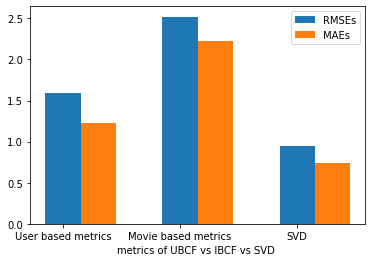

In [50]:
rmses = [rmse_u , rmse_i , rmse_svd]
maes = [mae_u,mae_i,mae_svd]
label = ['User based metrics','Movie based metrics','SVD']
plt.xticks(range(len(label)),labels=label)
plt.xlabel('metrics of UBCF vs IBCF vs SVD ')
plt.bar(np.arange(len(rmses)),rmses,width=0.3 ,label='RMSEs')
plt.bar(np.arange(len(maes))+0.3,maes,width=0.3 , label='MAEs')
plt.legend()